In [47]:
# CSE 417: Homework 5
# Name: Qingchuan Hou
# Student ID: 2127437
# UW NetID: qhou


from hashlib import new
import numpy as np
from time import time
import operator

from sympy import lcm_list

# Version 1 using naive algorithm
def closest_v1(points_list):
    points_list = np.array(points_list)
    n = len(points_list)
    if n <= 1:
        if n == 1:
            return np.inf, points_list[0][0], points_list[0][1], points_list[0][0], points_list[0][1]
        else:
            return np.NaN

    else:
        min_dist = np.inf
        for i in range(n-1):
            for j in range(i+1,n):
                dist = np.linalg.norm(points_list[i] - points_list[j])
                if dist <= min_dist:
                    min_dist = dist
                    index1 = i
                    index2 = j
    
        return min_dist, points_list[index1][0], points_list[index1][1], points_list[index2][0], points_list[index2][1]


# Version 2
def closest_v2(points_list):
    points_list = np.array(points_list)
    n = len(points_list)
    if n <= 1:
        return np.inf, points_list[0][0], points_list[0][1], points_list[0][0], points_list[0][1]
    
    else:
        sort_points = sorted(points_list, key = operator.itemgetter(0,1))#points_list[np.argsort(points_list[:, 0])]

        m = n//2
        points1 = sort_points[0:m]
        points2 = sort_points[m:n]
        min_dist_1, x1_1, y1_1, x2_1, y2_1 = closest_v2(points1)
        min_dist_2, x1_2, y1_2, x2_2, y2_2 = closest_v2(points2)

        if min_dist_1 < min_dist_2:
            min_dist, x1, y1, x2, y2 = min_dist_1, x1_1, y1_1, x2_1, y2_1
        else:
            min_dist, x1, y1, x2, y2 = min_dist_2, x1_2, y1_2, x2_2, y2_2

        mid_points = np.array([p for p in points_list if abs(p[0]-points_list[m][0]) <= min_dist])

        mid_points_sort = np.array(sorted(mid_points, key = operator.itemgetter(1,0)))


        for i in range(len(mid_points_sort)-1):
            for j in range(i+1, len(mid_points_sort)):
                if min_dist >= mid_points_sort[j][1] - mid_points_sort[i][1]:
                    dist = np.linalg.norm(mid_points_sort[i] - mid_points_sort[j])
                    if dist < min_dist:
                        min_dist = dist
                        x1, y1 = mid_points_sort[i][0], mid_points_sort[i][1]
                        x2, y2 = mid_points_sort[j][0], mid_points_sort[j][1]
        
    return min_dist, x1, y1, x2, y2


def points_list(text):

    points = list()

    while text:
        u = float(text.pop(0))
        v = float(text.pop(0))
        points += [[u,v]]

    return np.array(points)


def print_function(n, x1, y1, x2, y2, min_dist, run_time):
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    if x1 == x2 and y1 > y2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    print('%d,  %.3f, %.3f, %.3f, %.3f, %.3f, %.3f' % (n, x1, y1, x2, y2, min_dist, run_time))


def closest_v3(points_list):
    points_list = np.array(points_list)
    n = len(points_list)
    if n <= 1:
        return np.inf, points_list[0][0], points_list[0][1], points_list[0][0], points_list[0][1]
    
    else:
        sort_points = sorted(points_list, key = operator.itemgetter(0,1))
        min_dist, x1, y1, x2, y2 = v3_loop(sort_points)
    
    return min_dist, x1, y1, x2, y2


def v3_loop(points_list):
    n = len(points_list)
    if n <= 1:
        return np.inf, points_list[0][0], points_list[0][1], points_list[0][0], points_list[0][1]
    
    else:

        m = n//2
        points1 = points_list[0:m]
        points2 = points_list[m:n]
        min_dist_1, x1_1, y1_1, x2_1, y2_1 = v3_loop(points1)
        min_dist_2, x1_2, y1_2, x2_2, y2_2 = v3_loop(points2)

        if min_dist_1 < min_dist_2:
            min_dist, x1, y1, x2, y2 = min_dist_1, x1_1, y1_1, x2_1, y2_1
        else:
            min_dist, x1, y1, x2, y2 = min_dist_2, x1_2, y1_2, x2_2, y2_2

        # find points in midlle area
        mid_points = np.array([p for p in points_list if abs(p[0]-points_list[m][0]) <= min_dist])

        mid_points_sort = np.array(sorted(mid_points, key = operator.itemgetter(1,0)))

        # Chech the distance between two points in middle area
        for i in range(len(mid_points_sort)-1):
            for j in range(i+1, len(mid_points_sort)):
                if min_dist >= mid_points_sort[j][1] - mid_points_sort[i][1]:
                    dist = np.linalg.norm(mid_points_sort[i] - mid_points_sort[j])
                    if dist < min_dist:
                        min_dist = dist
                        x1, y1 = mid_points_sort[i][0], mid_points_sort[i][1]
                        x2, y2 = mid_points_sort[j][0], mid_points_sort[j][1]
                else:
                    break
        
    return min_dist, x1, y1, x2, y2


def main():

    text = list()

    while True:
        try:
            text += input().split()
        except EOFError:
            break;  

    points = points_list(text)

    n = len(points)

    start_time_v1 = time()
    min_dist_v1, x1_v1, y1_v1, x2_v1, y2_v1 = closest_v3(points)
    end_time_v1 = time()

    run_time_v1 = (end_time_v1 - start_time_v1) * 1000

    start_time_v2 = time()
    min_dist_v2, x1_v2, y1_v2, x2_v2, y2_v2 = closest_v2(points)
    end_time_v2 = time()

    run_time_v2 = (end_time_v2 - start_time_v2) * 1000


    print('Version 1, ', end='')
    print_function(n, x1_v1, y1_v1, x2_v1, y2_v1, min_dist_v1, run_time_v1)
    print('Version 2, ', end='')
    print_function(n, x1_v2, y1_v2, x2_v2, y2_v2, min_dist_v2, run_time_v2)


def cvs():
    # Try to open each file by sequence
    import pandas as pd
    df = pd.DataFrame(columns=['n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
    
    for n in range(1,100,5):

        # unit square
        sq_list = []
        for i in np.linspace(0,1,n):
            for j in np.linspace(0,1,n):
                sq_list += [[i,j]]
            

        start_time_v1 = time()
        closest_v3(sq_list)
        end_time_v1 = time()

        sq_run_time_v1 = (end_time_v1 - start_time_v1) * 1000

        start_time_v2 = time()
        min_dist_v2, x1_v2, y1_v2, x2_v2, y2_v2 = closest_v2(sq_list)
        end_time_v2 = time()

        sq_run_time_v2 = (end_time_v2 - start_time_v2) * 1000

        # line
        l_list = []
        for i in np.linspace(0,1,n**2):
            l_list += [[0,i]]
        l_list = np.array(l_list)
        start_time_v1 = time()
        min_dist_v1, x1_v1, y1_v1, x2_v1, y2_v1 = closest_v3(l_list)
        end_time_v1 = time()

        l_run_time_v1 = (end_time_v1 - start_time_v1) * 1000

        start_time_v2 = time()
        min_dist_v2, x1_v2, y1_v2, x2_v2, y2_v2 = closest_v2(l_list)
        end_time_v2 = time()

        l_run_time_v2 = (end_time_v2 - start_time_v2) * 1000
    
        df = df.append({'n' : n**2 , 'sq_run_time_v1' : sq_run_time_v1,  'sq_run_time_v2' : sq_run_time_v2, 'l_run_time_v1': l_run_time_v1, 'l_run_time_v2': l_run_time_v2}, ignore_index=1)

    return df        


if __name__ == '__main__':
    #main()
    df = cvs()

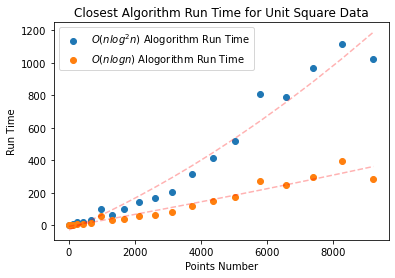

In [48]:
import numpy as np
import matplotlib.pyplot as plt
# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])


fig,ax = plt.subplots()

x1 = df['n']
y1 = df['sq_run_time_v2']

ax.scatter(x1, y1, label='$O(nlog^2n)$ Alogorithm Run Time')

z1 = np.polyfit(x1, y1, 2)
p1 = np.poly1d(z1)
ax.plot(x1,p1(x1),"r--", alpha=0.3)
ax.set_title('Closest Algorithm Run Time for Unit Square Data')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

x = df['n']
y = df['sq_run_time_v1']

ax.scatter(x, y, label='$O(nlogn)$ Alogorithm Run Time')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3)
# ax.set_title('Naive Algorithm in Unit Square')
# ax.set_ylabel('Run Time')
# ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()


plt.show()

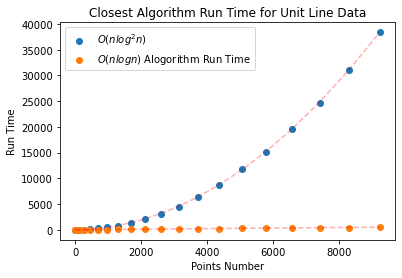

In [49]:
import numpy as np
import matplotlib.pyplot as plt
# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])

fig,ax = plt.subplots()


x1 = df['n']
y1 = df['l_run_time_v2']

ax.scatter(x1, y1, label='$O(nlog^2n)$')

z1 = np.polyfit(x1, y1, 2)
p1 = np.poly1d(z1)
ax.plot(x1,p1(x1),"r--", alpha=0.3)
ax.set_title('Closest Algorithm Run Time for Unit Line Data')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
ax.legend()


x = df['n']
y = df['l_run_time_v1']

ax.scatter(x, y, label='$O(nlogn)$ Alogorithm Run Time')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3)

ax.legend()


plt.show()

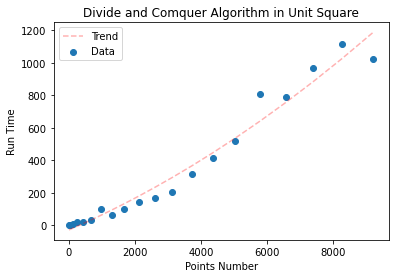

In [50]:

# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
x = df['n']
y = df['sq_run_time_v2']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_title('Divide and Comquer Algorithm in Unit Square')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

plt.show()

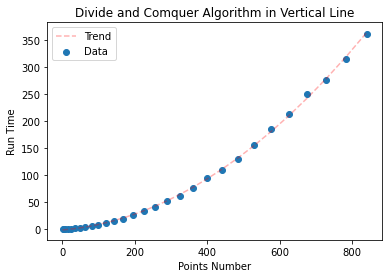

In [64]:
import numpy as np
import matplotlib.pyplot as plt
# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
x = df['n']
y = df['l_run_time_v2']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_title('Divide and Comquer Algorithm in Vertical Line')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

plt.show()

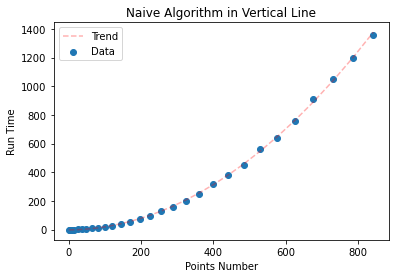

In [65]:
import numpy as np
import matplotlib.pyplot as plt
# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
x = df['n']
y = df['l_run_time_v1']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_title('Naive Algorithm in Vertical Line')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

plt.show()

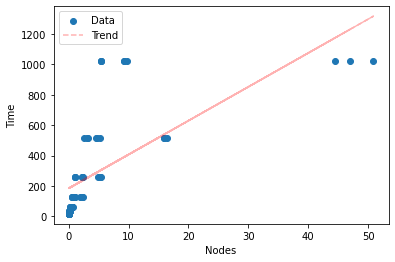

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y = df['nodes_number']
x = df['run_time']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_xlabel('Time')
ax.set_ylabel('Nodes')
# ax.set_title('Number of Nodes VS Run Time')
ax.legend()

plt.show()

In [ ]:
import numpy as np
a =np.array([1,2,3,4,5])

b = a[0:2]
c = a[2:len(a)]
b,c,len(a)

(array([1, 2]), array([3, 4, 5]), 5)

In [ ]:
for i in range(5-1):
    for j in range(i+1,5):
        print(i,j)

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4


In [ ]:
# CSE 417: Homework 5
# Name: Qingchuan Hou
# Student ID: 2127437
# UW NetID: qhou


from hashlib import new
import numpy as np
from time import time

# Version 1 using naive algorithm
def closest_v1(points_list):
    n = len(points_list)
    if n <= 1:
        if n == 1:
            return np.inf, points_list[0][0], points_list[0][1], points_list[0][0], points_list[0][1]
        else:
            return np.NaN

    else:
        min_dist = np.inf
        for i in range(n-1):
            for j in range(i+1,n):
                dist = np.linalg.norm(points_list[i] - points_list[j])
                if dist < min_dist:
                    min_dist = dist
                    index1 = i
                    index2 = j
    
        return min_dist, points_list[index1][0], points_list[index1][1], points_list[index2][0], points_list[index2][1]



# Version 2
def closest_v2(points_list):
    n = len(points_list)
    if n <= 2:
        return closest_v1(points_list)
    
    else:
        sort_points = points_list[np.argsort(points_list[:, 0])]
        m = n//2
        points1 = sort_points[0:m]
        points2 = sort_points[m:n]
        min_dist_1, x1_1, y1_1, x2_1, y2_1 = closest_v2(points1)
        min_dist_2, x1_2, y1_2, x2_2, y2_2 = closest_v2(points2)

        if min_dist_1 < min_dist_2:
            min_dist, x1, y1, x2, y2 = min_dist_1, x1_1, y1_1, x2_1, y2_1
        else:
            min_dist, x1, y1, x2, y2 = min_dist_2, x1_2, y1_2, x2_2, y2_2

        mid_points = np.array([p for p in points_list if abs(p[0]-points_list[m][0]) <= min_dist])
        print(mid_points)
        mid_points_sort = mid_points[mid_points[:,1].argsort()]

        for i in range(len(mid_points_sort)-1):
            for j in range(i+1, len(mid_points_sort)):
                if mid_points_sort[i][1] + min_dist > mid_points_sort[j][1]:
                    dist = np.linalg.norm(mid_points_sort[i] - points_list[j])
                    if dist < min_dist:
                        min_dist = dist
                        x1, y1 = mid_points_sort[i][0], mid_points_sort[i][1]
                        x2, y2 = mid_points_sort[j][0], mid_points_sort[j][1]
    
    return min_dist, x1, y1, x2, y2



def points_list(text):

    points = list()

    while text:
        u = float(text.pop(0))
        v = float(text.pop(0))
        points += [[u,v]]

    return np.array(points)



def print_function(n, x1, y1, x2, y2, min_dist, run_time):
    if x1 > x2:
        y1, x2 = x2, x1
        y1, y2 = y2, y1

    if x1 == x2 and y1 > y2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    print('%d,  %.1f, %.1f, %.1f, %.1f, %.3f, %.3f' % (n, x1, y1, x2, y2, min_dist, run_time))



def main():

    text = list()

    while True:
        try:
            text += input().split()
        except EOFError:
            break;  

    points = points_list(text)

    n = len(points)

    start_time_v1 = time()
    min_dist_v1, x1_v1, y1_v1, x2_v1, y2_v1 = closest_v1(points)
    end_time_v1 = time()

    run_time_v1 = (end_time_v1 - start_time_v1) * 1000

    start_time_v2 = time()
    min_dist_v2, x1_v2, y1_v2, x2_v2, y2_v2 = closest_v2(points)
    end_time_v2 = time()

    run_time_v2 = (end_time_v2 - start_time_v2) * 1000

    print('Version 1, ', end='')
    print_function(n, x1_v1, y1_v1, x2_v1, y2_v1, min_dist_v1, run_time_v1)
    print('Version 2, ', end='')
    print_function(n, x1_v2, y1_v2, x2_v2, y2_v2, min_dist_v2, run_time_v2)
    
main()

[[-1.  0.]
 [ 0.  1.]
 [ 0. -1.]]
Version 1, 4,  -1.0, 0.0, 0.0, 1.0, 1.414, 0.358
Version 2, 4,  -1.0, 0.0, 0.0, 1.0, 1.414, 0.326


In [ ]:
a = [0,1]
b = a[0:1]
b
len(a)

2